## Morphology

****

Morphology in OpenCV refers to a set of image processing operations that manipulate the shape and structure of objects in an image. These operations are based on mathematical morphology, which is a branch of mathematical theory that deals with the shape and structure of objects.

Morphological operations in OpenCV are typically performed on binary images, where each pixel is either black (0) or white (255). The most common morphological operations in OpenCV are erosion, dilation, opening, and closing.

Erosion is a morphological operation that shrinks the object boundaries by removing the pixels from the edges of the object. Erosion can be used to remove small objects or thin lines from an image.

Dilation is a morphological operation that expands the object boundaries by adding pixels to the edges of the object. Dilation can be used to fill small gaps in an object or to connect nearby objects.

Morphological operations in OpenCV can be performed using functions such as cv2.erode(), cv2.dilate(), etc. These functions take as input a binary image and a kernel, which is a structuring element that defines the shape and size of the operation. The kernel can be a simple 3x3 or 5x5 matrix, or a custom-shaped kernel can also be used.

Here is a brief explanation of each of the two most commonly used morphological functions in OpenCV:

Erosion:
Erosion is a morphological operation that removes the outermost layer of pixels in an image. The erosion function in OpenCV takes two arguments: the input image and a kernel, which defines the shape and size of the structuring element. During erosion, the kernel is placed over each pixel of the input image, and the output pixel is set to 0 (black) if any of the corresponding kernel pixels are 0. Otherwise, the output pixel is set to 1 (white).
The syntax for erosion function in OpenCV is:

cv2.erode(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])

where src is the input image, kernel is the structuring element, dst is the output image, anchor is the kernel anchor point, iterations is the number of times the erosion operation is applied, borderType is the border type, and borderValue is the border value.

Dilation:
Dilation is a morphological operation that adds pixels to the outermost layer of an object in an image. The dilation function in OpenCV takes two arguments: the input image and a kernel, which defines the shape and size of the structuring element. During dilation, the kernel is placed over each pixel of the input image, and the output pixel is set to 1 (white) if any of the corresponding kernel pixels are 1. Otherwise, the output pixel is set to 0 (black).
The syntax for dilation function in OpenCV is:

cv2.dilate(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])

where src is the input image, kernel is the structuring element, dst is the output image, anchor is the kernel anchor point, iterations is the number of times the dilation operation is applied, borderType is the border type, and borderValue is the border value.

Let's add these morphological operations to our skin detection code.

To improve the mask quality, morphological operations, erosion and dilation are applied using an elliptical kernel created with cv2.getStructuringElement() to remove noise and small holes within the skin area.

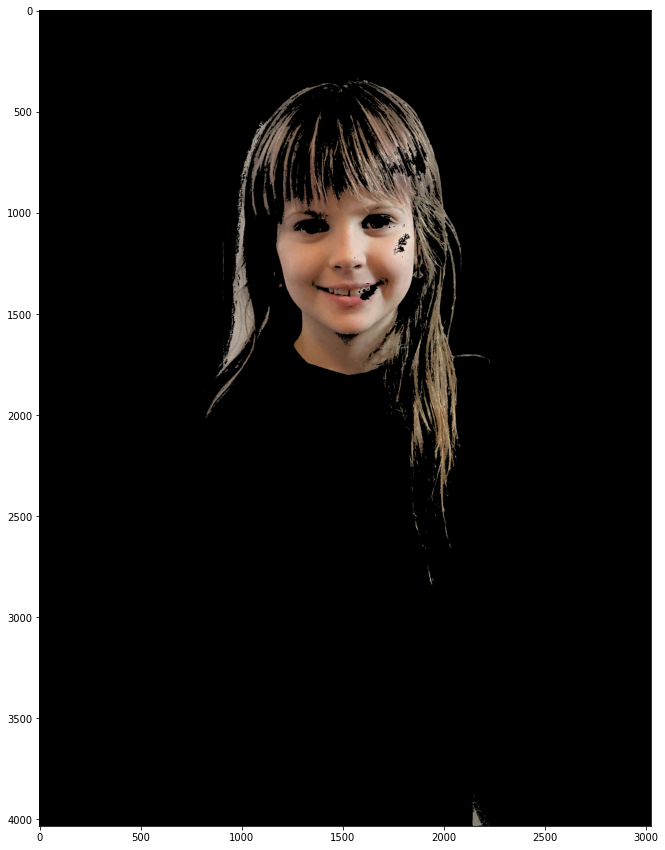

In [2]:
# First let's run the code without the morphological operations.

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("Graphics/coco.png", 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Minimum and maximum HSV values.
min_HSV = np.array([0,30,100], np.uint8)
max_HSV = np.array([25,170,240], np.uint8)

# cv2.inRange(image, minimum, maximum)
skinArea = cv2.inRange(img, min_HSV, max_HSV)

# Bitwise And mask
skinHSV = cv2.bitwise_and(img, img, mask=skinArea)

# Convert to RGB
skinHSV = cv2.cvtColor(skinHSV, cv2.COLOR_HSV2RGB)

# Make image larger on plot.
fig = plt.figure(figsize=(15,15))

# Plot masked image.
plt.imshow(skinHSV)

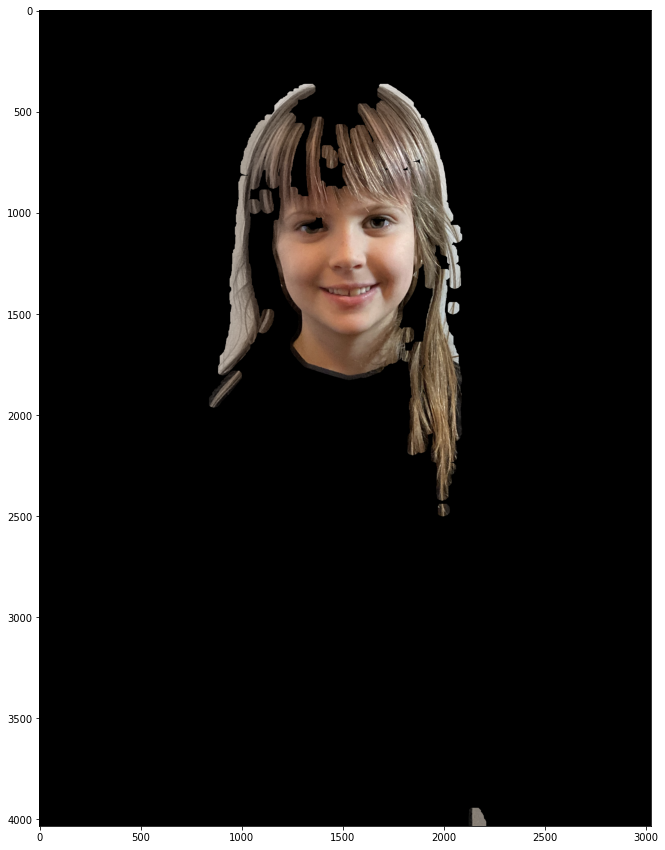

In [9]:
# Let's add the morphological operations

img = cv2.imread("Graphics/coco.png", 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Minimum and maximum HSV values.
min_HSV = np.array([0,30,100], np.uint8)
max_HSV = np.array([25,170,240], np.uint8)

# cv2.inRange(image, minimum, maximum)
skinArea = cv2.inRange(img, min_HSV, max_HSV)

# apply a series of erosions and dilations to the mask
# using an elliptical kernel to remove any small blobs of noise.
# You can use the cv2.getStructuringElement() function to create an elliptical kernel.
# You can also use a numpy array to create a custom kernel.
#kernel = np.array([[0, 0, 1, 0, 0],
#                   [0, 1, 1, 1, 0],
#                   [1, 1, 1, 1, 1],
#                   [0, 1, 1, 1, 0],
#                   [0, 0, 1, 0, 0]], np.uint8)
# This will create a 5x5 ellipse kernel with all ones.

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
skinArea = cv2.erode(skinArea, kernel, iterations = 1)
skinArea = cv2.dilate(skinArea, kernel, iterations = 6)


# Bitwise And mask
skinHSV = cv2.bitwise_and(img, img, mask=skinArea)

# Convert to RGB
skinHSV = cv2.cvtColor(skinHSV, cv2.COLOR_HSV2RGB)

# Make image larger on plot.
fig = plt.figure(figsize=(15,15))

# Plot masked image.
plt.imshow(skinHSV)